<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/NLP_Tweet_Sentiment_Analyzer_with_RNN_%26_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tweet Sentiment Analysis using RNN and LSTM**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [2]:
df=pd.read_excel('/content/TweetSentiment_60.xlsx')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
101154,4,@jessikasay congrats on the followers
101155,4,@dannywood As in &quot;back dat ass on up in h...
101156,4,School In about 12 minutes then I get picked u...
101157,4,@itsMeeeech -- sounds fun!


#Text Pre-processing

In [3]:
df.dtypes

target     int64
tweet     object
dtype: object

In [4]:
df["tweet"] = df["tweet"].astype(str)

Lower Casing

In [5]:
df["processed_tweets"] = df["tweet"].str.lower()

In [6]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [7]:
df.dtypes

target               int64
tweet               object
processed_tweets    object
dtype: object

In [8]:
print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])


Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [9]:
len(df['processed_tweets'])

101159

###**Removal of @ and User names**

To avoid the warning, you can use the below code but I like the second code for easy understanding

In [10]:
# tokenizer = TweetTokenizer(strip_handles=True)

# for a in range(len(df["processed_tweets"])):
#     result = tokenizer.tokenize(df["processed_tweets"][a])
#     result = " ".join(result)
#     df.loc[a, "processed_tweets"] = result

# print("\nTokenize a twitter text:")
# print(df["processed_tweets"])


In [11]:
tokenizer = TweetTokenizer(strip_handles=True)

for a in range(len(df["processed_tweets"])):

  result = tokenizer.tokenize(df["processed_tweets"][a])
  result = " ".join(result)

  df["processed_tweets"][a] = result


print("\nTokenize a twitter text:")
print(df["processed_tweets"])

<ipython-input-11-dd58092bc7d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processed_tweets"][a] = result



Tokenize a twitter text:
0         http://twitpic.com/2y1zl - awww , that's a bum...
1         is upset that he can't update his facebook by ...
2         i dived many times for the ball . managed to s...
3            my whole body feels itchy and like its on fire
4         no , it's not behaving at all . i'm mad . why ...
                                ...                        
101154                            congrats on the followers
101155    as in " back dat ass on up in here for some fu...
101156    school in about 12 minutes then i get picked u...
101157                                     - - sounds fun !
101158    good morning everyone welcome to my new follow...
Name: processed_tweets, Length: 101159, dtype: object


In [12]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww , that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no , it's not behaving at all . i'm mad . why ..."


###**Remove Punctuations**

In [13]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [14]:
df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text))

In [15]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove URLs**

In [16]:
def remove_URL(sample):
  return re.sub(r"http\S+", "", sample)

In [17]:
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)

In [18]:
tokenizer = TweetTokenizer(strip_handles = True)

for a in range(len(df["processed_tweets"])):

  result = remove_URL(df["processed_tweets"][a])
  df["processed_tweets"][a] = result

print("No URLs:")
print(result)

<ipython-input-18-b052a1790e6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processed_tweets"][a] = result


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [19]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove Emojis**

In [20]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [21]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result


<ipython-input-21-410463c71472>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


###**Removal of Emoticons¶**


In [22]:
# Reference: https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [23]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [24]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

<ipython-input-24-5918f88f12da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tweets'][a]=result


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [25]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [26]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

### **Labelling the target fileds**

In [27]:
df['target'].value_counts()

4    51150
0    50009
Name: target, dtype: int64

0 --> negative,
4 --> Positive

In [28]:
df['Target']=df['target'].replace(4,1)
df['Target'].value_counts()

1    51150
0    50009
Name: Target, dtype: int64

0 --> negative,
1 --> Positive

[Reference for maxlen](https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do)

In [29]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

###**Stop words**

In [30]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [31]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [32]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
101154,4,congrats followers,1
101155,4,back dat ass full service,1
101156,4,school 12 minutes get picked morgan,1
101157,4,sounds fun,1


###**Lammentization**

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
lemmatizer = nltk.WordNetLemmatizer()

def lemmatize_on_text(data):
  text = [lemmatizer.lemmatize(word) for word in data]
  return data

In [35]:
# Apply lemmatize_on_text function to the "processed_tweets" column of the DataFrame
df["processed_tweets"] = df["processed_tweets"].apply(lambda x: lemmatize_on_text(x))

In [36]:
# import pandas as pd
# import nltk
# nltk.download('punkt')
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Initialize the WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# # Define the lemmatize_on_text function
# def lemmatize_on_text(text):
#     # Tokenize the input text into words
#     tokenized_text = word_tokenize(text)

#     # Lemmatize each word in the tokenized text
#     lemmatized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]

#     # Join the lemmatized words back into a single string
#     return " ".join(lemmatized_text)

# # Apply lemmatize_on_text function to the "processed_tweets" column of the DataFrame
# df["processed_tweets"] = df["processed_tweets"].apply(lambda x: lemmatize_on_text(x))

# print(df)


In [37]:
df

,target,tweet,processed_tweets,Target
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...,0
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,0
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...,0
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire,0
4,0,"@nationwideclass no, it's not behaving at all....",no not behaving im mad cant see over,0
...,...,...,...,...
101154,4,@jessikasay congrats on the followers,congrats followers,1
101155,4,@dannywood As in &quot;back dat ass on up in h...,back dat ass full service,1
101156,4,School In about 12 minutes then I get picked u...,school 12 minutes get picked morgan,1
101157,4,@itsMeeeech -- sounds fun!,sounds fun,1


In [38]:
X = df['processed_tweets']
y = df['Target']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(91043,)
(10116,)


In [40]:
print(y_train.shape)
print(y_test.shape)

(91043,)
(10116,)


In [41]:
X_test

10538                                     ummmm wanna come
89283    lol aww celebrate earlier get loads complitmen...
40354             downloading 22nd episode heroes season 3
11834                                 going sleep im tired
585      cant set feet ground missing eyelid people mig...
                               ...                        
77266         oop hick ups oop nope awwwww wanted hick ups
51995    back 2 mile walk woobie doggie yet another stu...
22770              noooooo boo computer problems empathise
61798    hrm guess hit sack work 6 hours 9 hours later ...
36296                home justins farewell dinner dont die
Name: processed_tweets, Length: 10116, dtype: object

##**Text Sequencing**

In [42]:
# Tokenize and sequence sentences

from keras.preprocessing.text import Tokenizer

#On X_train
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
train_text_vec

[[104, 22, 621, 3425, 1148, 2, 107, 14, 1444, 3307, 1819, 30, 199, 183, 581],
 [507, 598, 978, 82, 2661, 3004, 70, 121],
 [1066, 179],
 [14852, 210, 1, 2662, 926],
 [4, 24],
 [4, 24, 1626, 284, 7748, 11846, 2, 46, 104, 45, 6, 1842],
 [965, 5954, 375, 4872, 759, 1, 4],
 [23, 17, 273, 25, 21422, 525, 8695, 725],
 [487, 435, 10036, 279, 14, 862, 10037, 37, 61, 17],
 [1047, 555, 53, 79, 187],
 [1032, 484, 115, 2181, 1329, 7008, 6409, 8696, 5, 61],
 [10, 2, 1, 12, 1297, 12, 3674, 11847, 466, 725, 21423, 21424, 2910, 1875],
 [298, 536, 2270, 98, 75],
 [18, 4387, 21425, 125, 5, 63],
 [16, 146, 25, 1787, 21, 3, 106, 202, 3192, 8, 4873],
 [24, 207, 43, 39, 70, 11848],
 [188, 247],
 [389, 4204, 4874, 161, 5, 5546, 1067, 141, 753, 42],
 [1758, 292, 12, 5955, 1008, 328, 27, 5955, 476, 536, 21426, 200],
 [1,
  1445,
  209,
  1491,
  262,
  102,
  5,
  3,
  599,
  27,
  22,
  381,
  43,
  38,
  244,
  38,
  27,
  88],
 [255, 3843, 53, 169],
 [2663, 241, 1788, 21427, 187, 2579, 1330, 241, 1404, 219, 

In [43]:
#On X_text
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[7002, 108, 68],
 [20, 307, 1608, 735, 6, 991, 52122, 308, 586, 852],
 [1728, 5511, 713, 2173, 517, 53],
 [12, 44, 1, 90],
 [15, 464, 848, 2085, 238, 15458, 75, 218, 6],
 [76, 99, 95, 264, 635, 9, 301, 10, 43, 5, 43, 758, 63, 16, 395, 1380, 53, 8],
 [33, 128, 23, 147, 252, 52123, 665, 95],
 [56, 103, 7, 8, 35, 23, 274, 301, 1304, 574, 194],
 [1008, 49, 12, 37, 70, 233, 4892, 182, 86, 311],
 [2860, 75, 142, 1547, 1611],
 [23, 133, 813, 1, 96, 1868, 816, 63, 6018, 658, 7496, 22710, 10076, 11, 4362],
 [364, 381, 34, 11, 142, 8, 5],
 [20, 13956, 503, 30, 1978, 9745],
 [68, 1639, 52124, 949, 79, 714],
 [106, 4, 3855, 21743, 19, 202, 1095, 2707, 180, 284, 72],
 [2548,
  226,
  8539,
  11,
  3229,
  2045,
  244,
  98,
  449,
  1,
  441,
  1440,
  3,
  13015,
  118,
  940],
 [10706, 2828, 48],
 [35, 227, 52125, 648, 215, 7, 2428, 325, 154, 99, 101, 648, 52126],
 [102, 1331, 246],
 [4, 267],
 [10, 187, 107],
 [985, 807, 639, 4, 125, 5002, 511, 579],
 [1173, 4731, 4410, 2717, 227, 2458, 916, 12

In [44]:
# Checking for the maximum length of text sequenece

length = []

for i in (train_text_vec + test_text_vec):
  if 10 < len(i) < 200:
    length.append(len(i))
max(length)

57

In [45]:
len(train_text_vec + test_text_vec)

101159

We can leave the maximum word length to 57

In [46]:
# Padding the sequences

from keras.preprocessing.sequence import pad_sequences

max_words = 58

X_train = pad_sequences(train_text_vec, maxlen = max_words, padding='post', truncating='post')
X_test = pad_sequences(test_text_vec, maxlen = max_words, padding='post', truncating='post')

In [47]:
print ("After Padding X[train[0]=\n", X_test[0])

After Padding X[train[0]=
 [7002  108   68    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


##**Modelling**

In [48]:
#checking for number of unique words in the tokenizer
word_index = tokenizer.word_index
print("Found %s of unique tokens." % len(word_index))

Found 55313 of unique tokens.


In [49]:
len((train_text_vec + test_text_vec))*2

202318

In [50]:
vocabulary_size = len((train_text_vec + test_text_vec))*2

##**Glove**

In [51]:
import numpy as np

#Glove
embeddings_index = {}

f = open('/content/glove.twitter.27B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [52]:
print('Found %s word vectors.' % len(embeddings_index))

Found 608283 word vectors.


In [53]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

#Recurrent Neural Network (RNN)

In [54]:
# Creating a simple RNN model and checking for accuracy

from keras.layers import SimpleRNN
from keras import regularizers

In [55]:
embedding_size = 100

modelRNN = Sequential()

modelRNN.add(Embedding(vocabulary_size, embedding_size, weights = [embedding_matrix], input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01)))
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))

In [56]:
modelRNN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [57]:
print(modelRNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 100)           20231800  
                                                                 
 dropout (Dropout)           (None, 58, 100)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 20269601 (77.32 MB)
Trainable params: 20269601 (77.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [58]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [59]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs,
             callbacks=callback_listRNN)

modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 1.2549 - accuracy: 0.5200

88/88 [==============================] - 94s 1s/step - loss: 1.2549 - accuracy: 0.5200 - val_loss: 0.8662 - val_accuracy: 0.5400
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.7549 - accuracy: 0.5649

88/88 [==============================] - 101s 1s/step - loss: 0.7549 - accuracy: 0.5649 - val_loss: 0.6583 - val_accuracy: 0.6562
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.6291

88/88 [==============================] - 103s 1s/step - loss: 0.6659 - accuracy: 0.6291 - val_loss: 0.6269 - val_accuracy: 0.6885
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.6663

88/88 [==============================] - 114s 1s/step - loss: 0.6333 - accuracy: 0.6663 - val_loss: 0.6011 - val_accuracy: 0.7070
Epoch 5/20
88/88 [==============================] - ETA: 0s - loss: 0.6034 - accuracy: 0.6941

88/88 [==============================] - 108s 1s/step - loss: 0.6034 - accuracy: 0.6941 - val_loss: 0.5454 - val_accuracy: 0.7324
Epoch 6/20
88/88 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.7123

88/88 [==============================] - 101s 1s/step - loss: 0.5797 - accuracy: 0.7123 - val_loss: 0.5332 - val_accuracy: 0.7490
Epoch 7/20
88/88 [==============================] - ETA: 0s - loss: 0.5657 - accuracy: 0.7230

88/88 [==============================] - 98s 1s/step - loss: 0.5657 - accuracy: 0.7230 - val_loss: 0.5392 - val_accuracy: 0.7383
Epoch 8/20
88/88 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.7345

88/88 [==============================] - 94s 1s/step - loss: 0.5509 - accuracy: 0.7345 - val_loss: 0.5209 - val_accuracy: 0.7383
Epoch 9/20
88/88 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7453

88/88 [==============================] - 95s 1s/step - loss: 0.5348 - accuracy: 0.7453 - val_loss: 0.5249 - val_accuracy: 0.7646
Epoch 10/20
88/88 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.7540

88/88 [==============================] - 93s 1s/step - loss: 0.5238 - accuracy: 0.7540 - val_loss: 0.5076 - val_accuracy: 0.7627
Epoch 11/20
88/88 [==============================] - ETA: 0s - loss: 0.5088 - accuracy: 0.7628

88/88 [==============================] - 97s 1s/step - loss: 0.5088 - accuracy: 0.7628 - val_loss: 0.4991 - val_accuracy: 0.7598
Epoch 12/20
88/88 [==============================] - ETA: 0s - loss: 0.5005 - accuracy: 0.7682

88/88 [==============================] - 93s 1s/step - loss: 0.5005 - accuracy: 0.7682 - val_loss: 0.4902 - val_accuracy: 0.7656
Epoch 13/20
88/88 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.7713

88/88 [==============================] - 99s 1s/step - loss: 0.4939 - accuracy: 0.7713 - val_loss: 0.4998 - val_accuracy: 0.7656
Epoch 14/20
88/88 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.7795

88/88 [==============================] - 93s 1s/step - loss: 0.4852 - accuracy: 0.7795 - val_loss: 0.4894 - val_accuracy: 0.7725
Epoch 15/20
88/88 [==============================] - ETA: 0s - loss: 0.4818 - accuracy: 0.7799

88/88 [==============================] - 99s 1s/step - loss: 0.4818 - accuracy: 0.7799 - val_loss: 0.4996 - val_accuracy: 0.7686
Epoch 16/20
88/88 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.7813

88/88 [==============================] - 106s 1s/step - loss: 0.4824 - accuracy: 0.7813 - val_loss: 0.5419 - val_accuracy: 0.7637
Epoch 17/20
88/88 [==============================] - ETA: 0s - loss: 0.5085 - accuracy: 0.7721

88/88 [==============================] - 101s 1s/step - loss: 0.5085 - accuracy: 0.7721 - val_loss: 0.5191 - val_accuracy: 0.7598
Epoch 18/20
88/88 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.7924

88/88 [==============================] - 94s 1s/step - loss: 0.4696 - accuracy: 0.7924 - val_loss: 0.4874 - val_accuracy: 0.7793
Epoch 19/20
88/88 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7947

88/88 [==============================] - 100s 1s/step - loss: 0.4596 - accuracy: 0.7947 - val_loss: 0.5270 - val_accuracy: 0.7783
Epoch 20/20
88/88 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7979

88/88 [==============================] - 96s 1s/step - loss: 0.4538 - accuracy: 0.7979 - val_loss: 0.4818 - val_accuracy: 0.7861


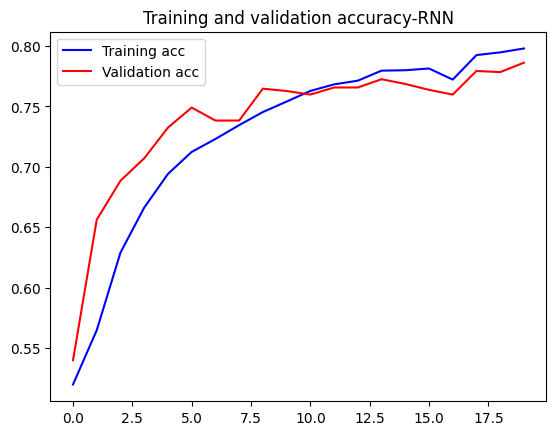

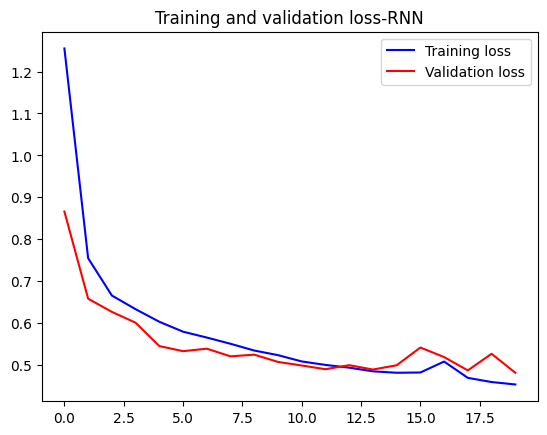

In [60]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()

plt.show()

#Loading the last epoch modeln (Optional)

In [61]:
#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh"))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 58, 100)           20231800  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20269601 (77.32 MB)
Trainable params: 20269601 (77.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


#LSTM

In [62]:
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [63]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [64]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,100,weights = [embedding_matrix],input_length=58)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01)))
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))

In [65]:
modelLSTM.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [66]:
print(modelLSTM.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 58, 100)           20231800  
                                                                 
 dropout_2 (Dropout)         (None, 58, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20382551 (77.75 MB)
Trainable params: 20382551 (77.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [67]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [68]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs,
             callbacks=callback_listLSTM)
modelLSTM.save_weights("my_modLSTM_Latest")

Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 1.1924 - accuracy: 0.5628

88/88 [==============================] - 226s 3s/step - loss: 1.1924 - accuracy: 0.5628 - val_loss: 0.6903 - val_accuracy: 0.6426
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.6507

88/88 [==============================] - 216s 2s/step - loss: 0.6471 - accuracy: 0.6507 - val_loss: 0.6004 - val_accuracy: 0.6846
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.6962

88/88 [==============================] - 214s 2s/step - loss: 0.5902 - accuracy: 0.6962 - val_loss: 0.5322 - val_accuracy: 0.7305
Epoch 4/20
88/88 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7231

88/88 [==============================] - 213s 2s/step - loss: 0.5589 - accuracy: 0.7231 - val_loss: 0.5061 - val_accuracy: 0.7559
Epoch 5/20
88/88 [==============================] - ETA: 0s - loss: 0.5397 - accuracy: 0.7379

88/88 [==============================] - 215s 2s/step - loss: 0.5397 - accuracy: 0.7379 - val_loss: 0.5187 - val_accuracy: 0.7520
Epoch 6/20
88/88 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.7487

88/88 [==============================] - 215s 2s/step - loss: 0.5220 - accuracy: 0.7487 - val_loss: 0.4848 - val_accuracy: 0.7793
Epoch 7/20
88/88 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.7595

88/88 [==============================] - 215s 2s/step - loss: 0.5071 - accuracy: 0.7595 - val_loss: 0.4848 - val_accuracy: 0.7725
Epoch 8/20
88/88 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.7657

88/88 [==============================] - 215s 2s/step - loss: 0.4961 - accuracy: 0.7657 - val_loss: 0.4765 - val_accuracy: 0.7734
Epoch 9/20
88/88 [==============================] - ETA: 0s - loss: 0.4872 - accuracy: 0.7721

88/88 [==============================] - 212s 2s/step - loss: 0.4872 - accuracy: 0.7721 - val_loss: 0.4721 - val_accuracy: 0.7773
Epoch 10/20
88/88 [==============================] - ETA: 0s - loss: 0.4760 - accuracy: 0.7793

88/88 [==============================] - 213s 2s/step - loss: 0.4760 - accuracy: 0.7793 - val_loss: 0.4731 - val_accuracy: 0.7822
Epoch 11/20
88/88 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.7859

88/88 [==============================] - 213s 2s/step - loss: 0.4682 - accuracy: 0.7859 - val_loss: 0.4657 - val_accuracy: 0.7881
Epoch 12/20
88/88 [==============================] - ETA: 0s - loss: 0.4604 - accuracy: 0.7897

88/88 [==============================] - 219s 2s/step - loss: 0.4604 - accuracy: 0.7897 - val_loss: 0.4718 - val_accuracy: 0.7891
Epoch 13/20
88/88 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.7933

88/88 [==============================] - 215s 2s/step - loss: 0.4525 - accuracy: 0.7933 - val_loss: 0.4634 - val_accuracy: 0.7842
Epoch 14/20
88/88 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.7995

88/88 [==============================] - 220s 3s/step - loss: 0.4440 - accuracy: 0.7995 - val_loss: 0.4708 - val_accuracy: 0.7803
Epoch 15/20
88/88 [==============================] - ETA: 0s - loss: 0.4391 - accuracy: 0.8034

88/88 [==============================] - 215s 2s/step - loss: 0.4391 - accuracy: 0.8034 - val_loss: 0.4624 - val_accuracy: 0.7881
Epoch 16/20
88/88 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.8064

88/88 [==============================] - 210s 2s/step - loss: 0.4342 - accuracy: 0.8064 - val_loss: 0.4628 - val_accuracy: 0.7832
Epoch 17/20
88/88 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.8101

88/88 [==============================] - 212s 2s/step - loss: 0.4260 - accuracy: 0.8101 - val_loss: 0.4681 - val_accuracy: 0.7812
Epoch 18/20
88/88 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8152

88/88 [==============================] - 211s 2s/step - loss: 0.4185 - accuracy: 0.8152 - val_loss: 0.4605 - val_accuracy: 0.7881
Epoch 19/20
88/88 [==============================] - ETA: 0s - loss: 0.4162 - accuracy: 0.8166

88/88 [==============================] - 212s 2s/step - loss: 0.4162 - accuracy: 0.8166 - val_loss: 0.4618 - val_accuracy: 0.7832
Epoch 20/20
88/88 [==============================] - ETA: 0s - loss: 0.4085 - accuracy: 0.8202

88/88 [==============================] - 213s 2s/step - loss: 0.4085 - accuracy: 0.8202 - val_loss: 0.4651 - val_accuracy: 0.7842


##**Performance Measure**

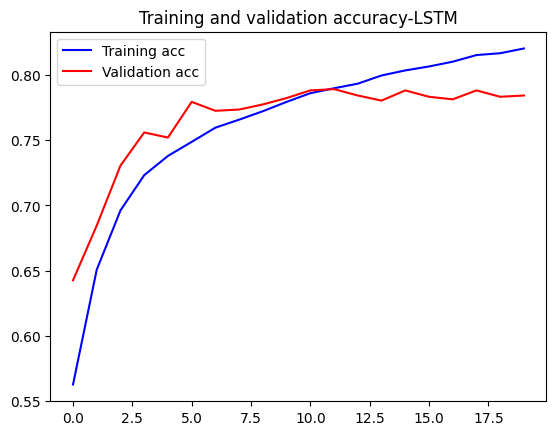

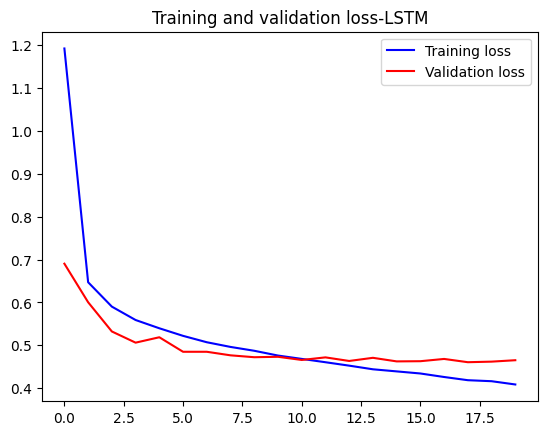

In [69]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()

plt.show()

###**Confusion matrix and classification_report**

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
y_predict = modelRNN.predict(X_test)

317/317 [==============================] - 5s 14ms/step


In [72]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

In [73]:

print(classification_report(y_test, y_predict.round()))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      4986
           1       0.62      0.63      0.63      5130

    accuracy                           0.62     10116
   macro avg       0.62      0.62      0.62     10116
weighted avg       0.62      0.62      0.62     10116



<Axes: >

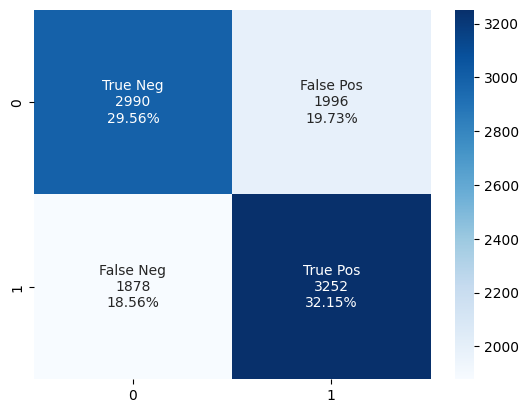

In [74]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

##**Custom Tweet For Extra Test**

In [75]:
test_data=['today is a sad day','he was happy today','not a good job']

In [79]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


max_words = 58


test_data = ['today is a sad day', 'he was happy today', 'not a good job']

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(test_data)

# Pad sequences to ensure uniform length
x_test = pad_sequences(sequences, maxlen=max_words)

# x_test is ready to use
print(x_test)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  11  61   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  62  11]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   4 276]]


In [81]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])

  res=modelRNN.predict(x_test)
  if res[i]>0.5:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

Test sentence:- today is a sad day
1/1 [==============================] - 0s 124ms/step
Sentiment type:Positive [0.7296862]

Test sentence:- he was happy today
1/1 [==============================] - 0s 136ms/step
Sentiment type:Positive [0.6720583]

Test sentence:- not a good job
1/1 [==============================] - 0s 132ms/step
Sentiment type:Positive [0.64494324]



In [82]:
#Here, our model is making error, hence needs further model turning, this can be done by altering the complexity of the model.